# AI/ML Salaries
## Data Science job salaries from 2020 to 2023

The salaries are from ai-jobs. Ai-jobs collects salary information anonymously from professionals all over the world in the AI/ML and Big Data space and makes it publicly available for anyone to use, share and play around with. The data is being updated regularly with new data coming in, usually on a weekly basis.
The primary goal is to have data that can provide better guidance in regards to what's being paid globally. So newbies, experienced pros, hiring managers, recruiters and also startup founders or people wanting to make a career switch can make better informed decisions.

## The dataset contains one table structured as follow:

- **work_year:** The year the salary was paid.
- **experience_level:** The experience level in the job during the year with the following possible values:
    - **EN:** Entry-level / Junior
    - **MI:** Mid-level / Intermediate
    - **SE:** Senior-level / Expert
    - **EX:** Executive-level / Director
- **employment_type:** The type of employement for the role:
    - **PT:** Part-time
    - **FT:** Full-time
    - **CT:** Contract
    - **FL:** Freelance
- **job_title:** The role worked in during the year.
- **salary:** The total gross salary amount paid.
- **salary_currency:** The currency of the salary paid as an ISO 4217 currency code.
- **salary_in_usd:** The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).
- **employee_residence:** Employee's primary country of residence in during the work year as an ISO 3166 country code.
- **remote_ratio:** The overall amount of work done remotely, possible values are as follows:
    - **0:** No remote work (less than 20%)
    - **50:** Partially remote
    - **100:** Fully remote (more than 80%)
- **company_location:** The country of the employer's main office or contracting branch as an ISO 3166 country code.
- **company_size:** The average number of people that worked for the company during the year:
    - **S:** less than 50 employees (small)
    - **M:** 50 to 250 employees (medium)
    - **L:** more than 250 employees (large)

In [144]:
import pandas as pd
df = pd.read_csv('salaries.csv', sep = ',', engine = 'python')
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,EN,FT,Data Analyst,75000,USD,75000,US,100,US,M
1,2023,EN,FT,Data Analyst,60000,USD,60000,US,100,US,M
2,2023,MI,FT,Analytics Engineer,185700,USD,185700,US,0,US,M
3,2023,MI,FT,Analytics Engineer,165000,USD,165000,US,0,US,M
4,2023,SE,FT,Data Engineer,160000,USD,160000,US,100,US,M
5,2023,SE,FT,Data Engineer,130000,USD,130000,US,100,US,M
6,2023,SE,FT,Data Analyst,169000,USD,169000,US,0,US,M
7,2023,SE,FT,Data Analyst,110600,USD,110600,US,0,US,M
8,2023,SE,FT,Data Operations Engineer,193000,USD,193000,US,100,US,M
9,2023,SE,FT,Data Operations Engineer,136850,USD,136850,US,100,US,M


In [145]:
# handle missing checking
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [146]:
# check labels for encoding
print(f"work year: {df['work_year'].unique()}")
print(f"experience_level: {df['experience_level'].unique()}")
print(f"employment_type: {df['employment_type'].unique()}")
print(f"job_title: {df['job_title'].unique()}")
print(f"salary_currency: {df['salary_currency'].unique()}")
print(f"employee_residence: {df['employee_residence'].unique()}")
print(f"remote_ratio: {df['remote_ratio'].unique()}")
print(f"company_location: {df['company_location'].unique()}")
print(f"company_size: {df['company_size'].unique()}")

work year: [2023 2022 2021 2020]
experience_level: ['EN' 'MI' 'SE' 'EX']
employment_type: ['FT' 'FL' 'PT' 'CT']
job_title: ['Data Analyst' 'Analytics Engineer' 'Data Engineer'
 'Data Operations Engineer' 'Machine Learning Engineer' 'Data Scientist'
 'BI Developer' 'Data Science Lead' 'ML Engineer' 'Data Science Manager'
 'Data Analytics Manager' 'Data Architect' 'BI Data Engineer'
 'Deep Learning Researcher' 'BI Analyst' 'Data Science Consultant'
 'Research Scientist' 'Data Analytics Specialist' 'AI Developer'
 'Data Engineering' 'Software Data Engineer' 'Machine Learning Scientist'
 'Data Manager' 'Machine Learning Infrastructure Engineer'
 'Business Data Analyst' 'Head of Data' 'Computer Vision Engineer'
 'BI Data Analyst' 'Lead Data Scientist' 'Research Engineer'
 'Head of Data Science' 'Data Quality Analyst' 'Insight Analyst'
 'Applied Machine Learning Engineer' 'AI Scientist'
 'Deep Learning Engineer' 'Data Infrastructure Engineer'
 'Machine Learning Software Engineer' 'Big Data A

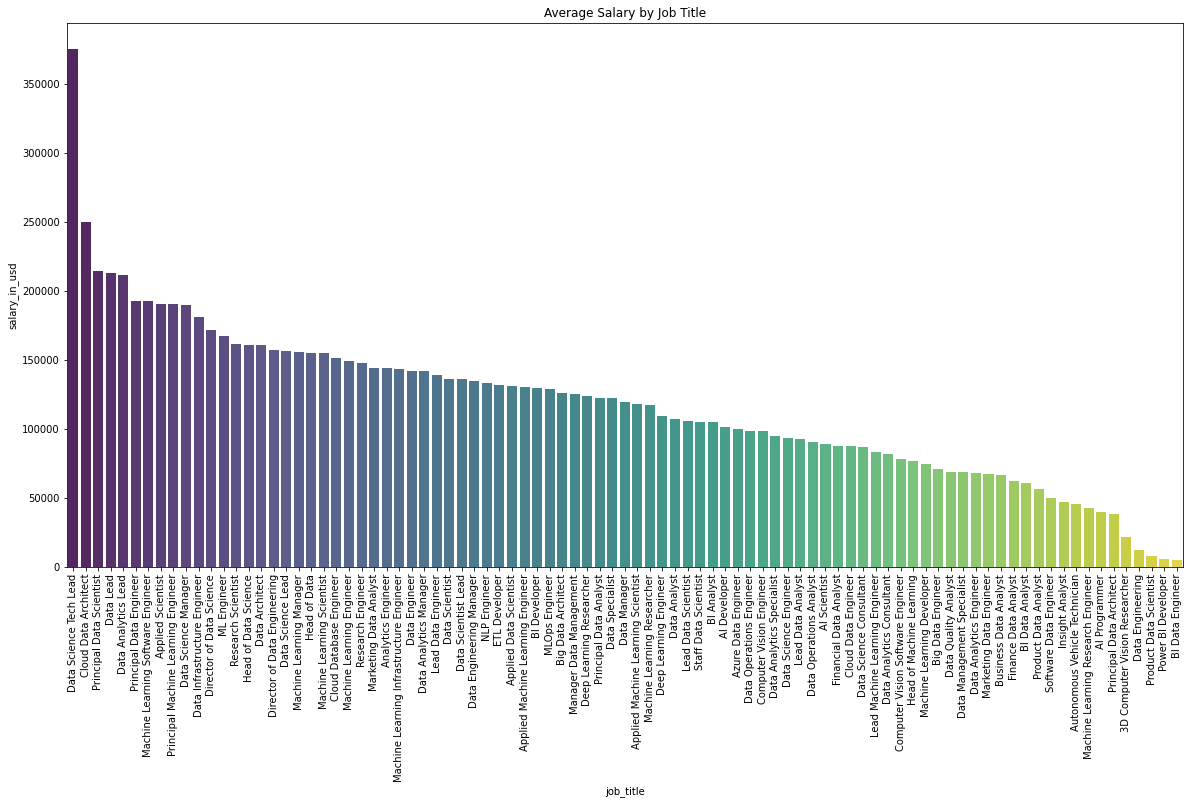

In [147]:
# analysis salary data in us dollar by using job title
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (replace 'path_to_dataset.csv' with the actual path)
plot_df = df.copy()

# Create a figure with a single subplot

# Calculate the average salary for each job title
average_salary_by_job = plot_df.groupby('job_title')['salary_in_usd'].mean().reset_index()

# Sort the job titles by average salary in descending order
average_salary_by_job = average_salary_by_job.sort_values(by='salary_in_usd', ascending=False)
# print(average_salary_by_job)

# Create a bar chart of average salaries by job title
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x='job_title', y='salary_in_usd', data=average_salary_by_job, ax=ax, palette='viridis', alpha=0.9)
plt.title('Average Salary by Job Title')
plt.xticks(rotation=90)
plt.show()

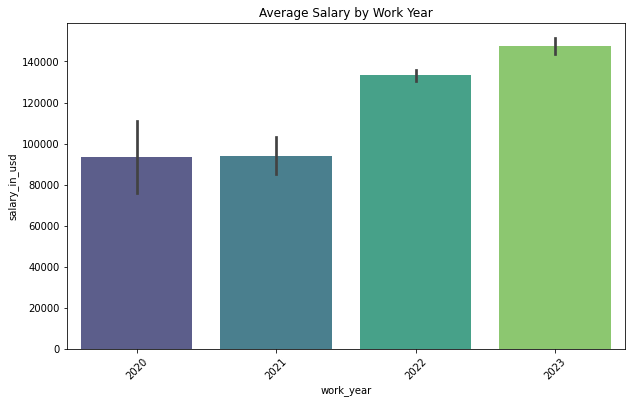

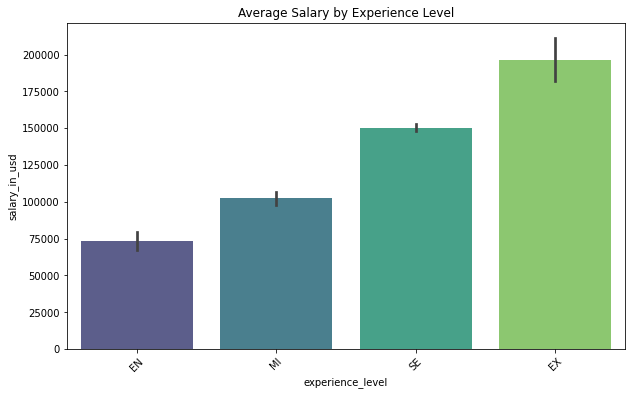

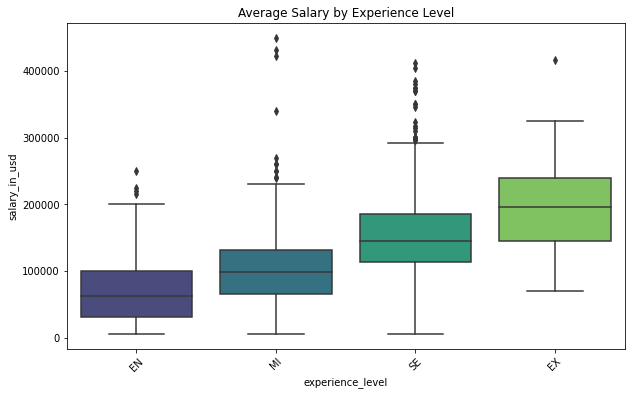

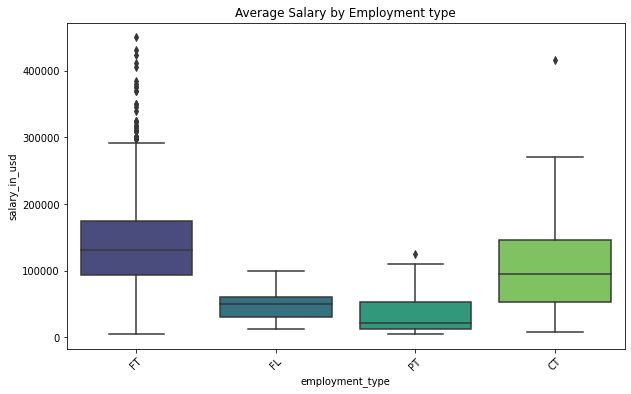

<Figure size 1080x720 with 0 Axes>

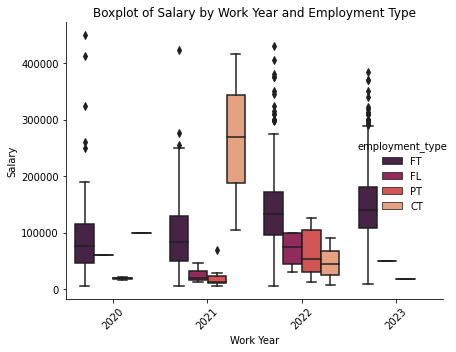

In [163]:
# analysis salary data in us dollar by using work_year, experience_level, employment_type
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (replace 'path_to_dataset.csv' with the actual path)
plot_df = df.copy()

# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='work_year', y='salary_in_usd', data=plot_df, ax=ax, palette='viridis', alpha=0.9)
plt.title('Average Salary by Work Year')
plt.xticks(rotation=45)
plt.show()

# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='experience_level', y='salary_in_usd', data=plot_df, ax=ax, palette='viridis', alpha=0.9)
plt.title('Average Salary by Experience Level')
plt.xticks(rotation=45)
plt.show()

# comparing graph with box plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=plot_df, ax=ax, palette='viridis')
plt.title('Average Salary by Experience Level')
plt.xticks(rotation=45)
plt.show()

# comparing graph with box plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='employment_type', y='salary_in_usd', data=plot_df, ax=ax, palette='viridis')
plt.title('Average Salary by Employment type')
plt.xticks(rotation=45)
plt.show()

# # Convert 'work_year' to string
# plot_df['work_year'] = plot_df['work_year'].astype(str)
# plot_df = plot_df.sort_values(by='work_year', ascending=True)

# # Create a FacetGrid for subplots
# g = sns.FacetGrid(plot_df, col='experience_level', margin_titles=True)
# g.map(sns.boxplot, 'work_year', 'salary_in_usd')

# # Set titles for the subplots
# g.set_axis_labels('Work Year', 'salary in US dollar')
# g.set_titles(col_template="{col_name}", row_template="{row_name}")

# # Adjust the size of the plots
# g.fig.set_size_inches(15, 10)

# # Show the plot
# plt.tight_layout()
# plt.show()

# # Create a FacetGrid for subplots
# g = sns.FacetGrid(plot_df, col='employment_type', margin_titles=True)
# g.map(sns.boxplot, 'work_year', 'salary_in_usd')

# # Set titles for the subplots
# g.set_axis_labels('Work Year', 'salary in US dollar')
# g.set_titles(col_template="{col_name}", row_template="{row_name}")

# # Adjust the size of the plots
# g.fig.set_size_inches(15, 10)

# # Show the plot
# plt.tight_layout()
# plt.show()

# Create a boxplot using catplot
plt.figure(figsize=(15, 10))
sns.catplot(x='work_year', y='salary_in_usd', hue='employment_type', kind='box', data=plot_df, palette="rocket")
plt.title('Boxplot of Salary by Work Year and Employment Type')
plt.xlabel('Work Year')
plt.ylabel('Salary')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

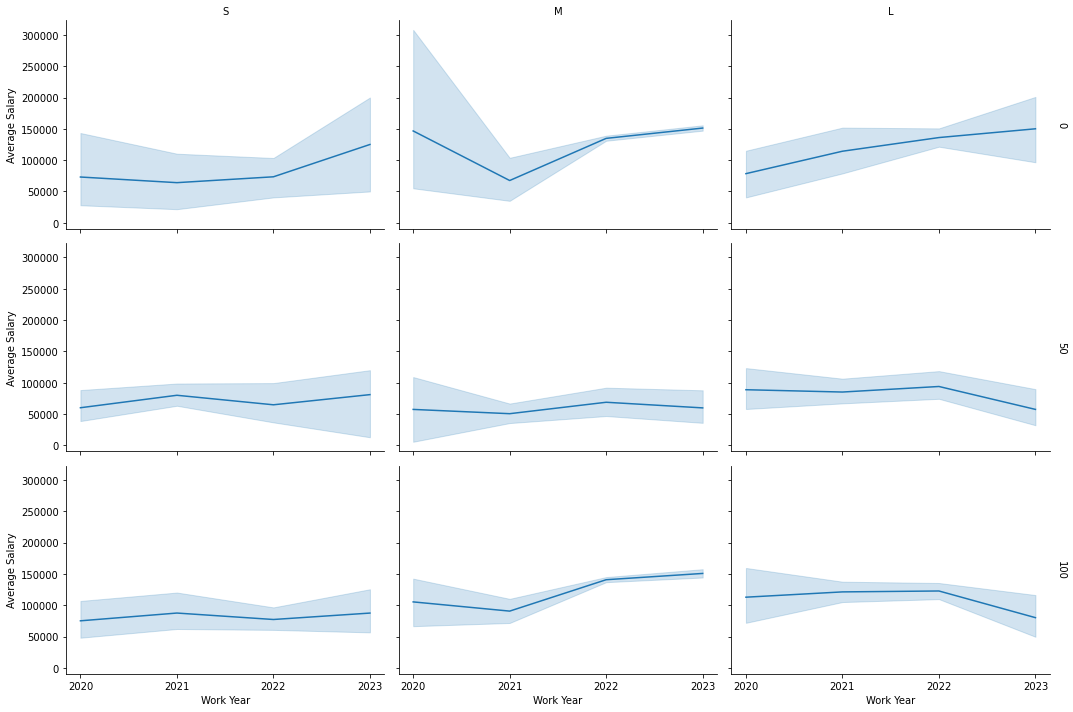

In [149]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (replace 'path_to_dataset.csv' with the actual path)
plot_df = df.copy()

# Convert 'work_year' to string
plot_df['work_year'] = plot_df['work_year'].astype(str)
plot_df = plot_df.sort_values(by='work_year', ascending=True)

# Create a FacetGrid for subplots
g = sns.FacetGrid(plot_df, col='company_size', row='remote_ratio', margin_titles=True)
g.map(sns.lineplot, 'work_year', 'salary_in_usd')

# Set titles for the subplots
g.set_axis_labels('Work Year', 'Average Salary')
g.set_titles(col_template="{col_name}", row_template="{row_name}")

# Adjust the size of the plots
g.fig.set_size_inches(15, 10)

# Show the plot
plt.tight_layout()
plt.show()
